# Improving Plot Aesthetics

Previously we learned how to use visualizations to explore and understand data. We merely focused on the workflow of quickly creating, tweaking, displaying, and iterating on plots.

The next chapter will focus on how to use data visualization to communicate insights and tell stories. We'll start with a standard matplotlib plot and improve its appearance to better communicate the patterns we want a viewer to understand.

In this mission and the next few missions, we'll explore how we can communicate the nuanced narrative of gender gap using effective data visualization.


## Dataset

The [Department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp) releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.



In [13]:
import pandas as pd
import matplotlib.pyplot as plt

#%matplotlib inline

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')

#women_degrees.head(5)

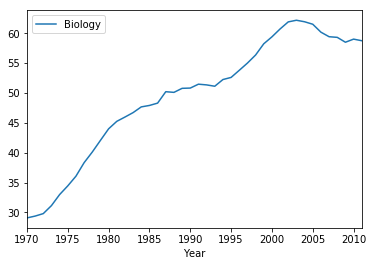

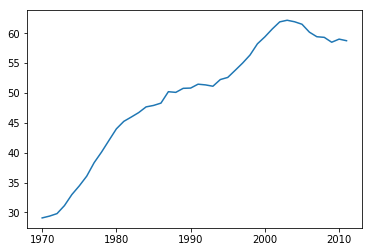

In [15]:
# Pandas quick function:
women_degrees.plot(x='Year', y='Biology')
plt.show()

#alternative:
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.show()

### Findings
From the plot, we can tell that Biology degrees **increased steadily from 1970** and **peaked in the early 2000's**. We can also tell that the percentage has stayed **above 50% since around 1987**. While it's helpful to visualize the trend of Biology degrees awarded to women, it only tells half the story. If we want the gender gap to be apparent and emphasized in the plot, we need a visual analogy to the difference in the percentages between the genders.

## Include Men analysis

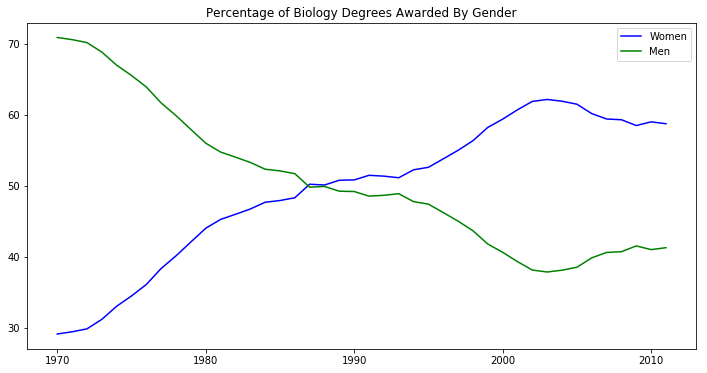

In [21]:
fig = plt.figure(figsize=(12,6))


plt.plot(women_degrees['Year'],women_degrees['Biology']  , label='Women', c='blue')
plt.plot(women_degrees['Year'],100-women_degrees['Biology'] , label='Men', c='green')

plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.legend(loc='upper right')
plt.show()

### Findings
The chart containing both line charts tells a more complete story than the one containing just the line chart that visualized just the women percentages. This plot instead tells the story of two distinct periods. In the first period, from 1970 to around 1987, women were a minority when it came to majoring in Biology while in the second period, from around 1987 to around 2012, women became a majority. You can see the point where women overtook men where the lines intersect. While a viewer could have reached the same conclusions using the individual line chart of just the women percentages, it would have required more effort and mental processing on their part.

## Reduce Chartjunk

Although our plot is better, it still contains some extra visual elements that aren't necessary to understand the data. We're interested in helping people understand the gender gap in different fields across time. These excess elements, sometimes known as chartjunk, increase as we add more plots for visualizing the other degrees, making it harder for anyone trying to interpret our charts. In general, we want to maximize the data-ink ratio, which is the fractional amount of the plotting area dedicated to displaying the data.

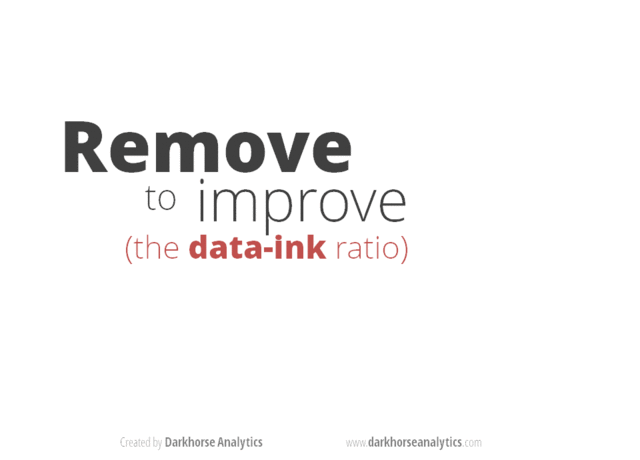

To improve the data-ink ratio, let's make the following changes to the plot we created in the last step:

* Remove all of the axis tick marks.
* Hide the spines, which are the lines that connects the tick marks, on each axis.

### Ticks

To **customize the appearance of the ticks**, we use the `Axes.tick_params()` method. Using this method, we can modify which tick marks and tick labels are displayed. By default, matplotlib displays the tick marks on all four sides of the plot. Here are the four sides for a standard line chart:

* The left side is the y-axis.
* The bottom side is the x-axis.
* The top side is across from the x-axis.
* The right side is across from the y-axis.

The parameters for **enabling or disabling tick marks** are conveniently named after the sides. To hide all of them, we need to pass in the following values for each parameter when we call `Axes.tick_params()`:

* bottom: "off"
* top: "off"
* left: "off"
* right: "off"


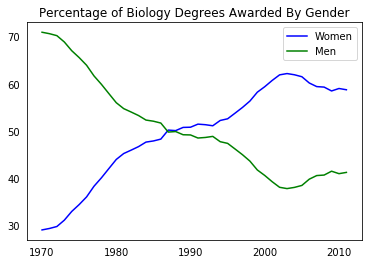

In [24]:
fig, ax = plt.subplots()

plt.plot(women_degrees['Year'],women_degrees['Biology']  , label='Women', c='blue')
plt.plot(women_degrees['Year'],100-women_degrees['Biology'] , label='Men', c='green')

ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.legend(loc='upper right')
plt.show()


### Hide Spines

With the axis tick marks gone, the data-ink ratio is improved and the chart looks much cleaner. In addition, the spines in the chart now are no longer necessary. When we're exploring data, the spines and the ticks complement each other to help us refer back to specific data points or ranges. When a viewer is viewing our chart and trying to understand the insight we're presenting, the ticks and spines can get in the way. As we mentioned earlier, chartjunk becomes much more noticeable when you have multiple plots in the same chart. By keeping the axis tick labels but not the spines or tick marks, we strike an appropriate balance between hiding chartjunk and making the data visible.



In matplotlib, the spines are represented using the **`matplotlib.spines.Spine` class**. When we create an Axes instance, four Spine objects are created for us. If you run `print(ax.spines)`, you'll get back a dictionary of the Spine objects:

In [25]:
print(ax.spines)

OrderedDict([('left', <matplotlib.spines.Spine object at 0x10a659748>), ('right', <matplotlib.spines.Spine object at 0x10a6596a0>), ('bottom', <matplotlib.spines.Spine object at 0x10a6fb3c8>), ('top', <matplotlib.spines.Spine object at 0x10a104908>)])


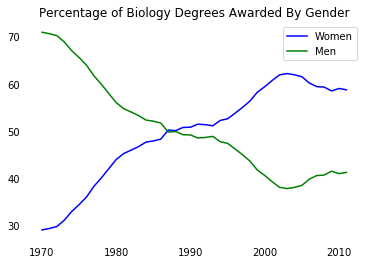

In [28]:
fig, ax = plt.subplots()

plt.plot(women_degrees['Year'],women_degrees['Biology']  , label='Women', c='blue')
plt.plot(women_degrees['Year'],100-women_degrees['Biology'] , label='Men', c='green')

#remove ticks
ax.tick_params(bottom="off", top="off", left="off", right="off")

#Remove spines
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

plt.title('Percentage of Biology Degrees Awarded By Gender')
plt.legend(loc='upper right')
plt.show()

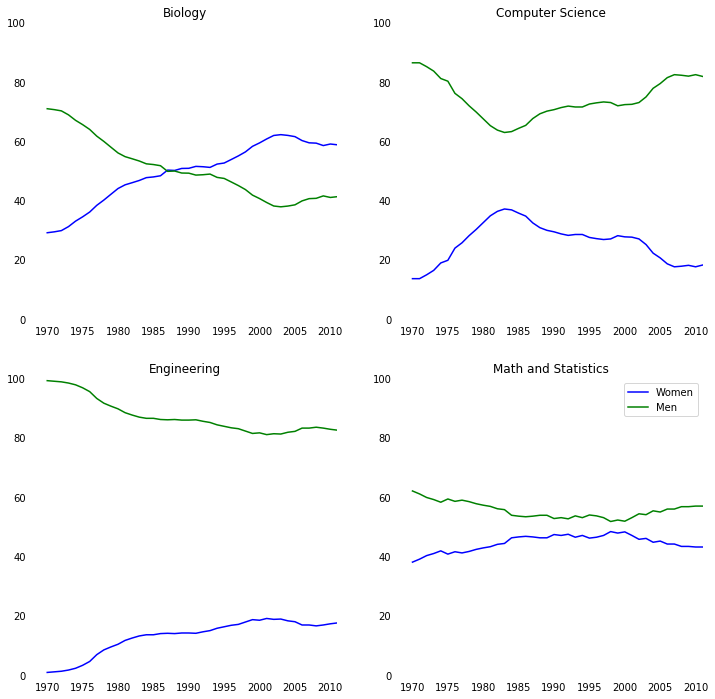

In [32]:
major_cats = ['Biology', 'Computer Science', 'Engineering', 'Math and Statistics']
fig = plt.figure(figsize=(12, 12))

for sp in range(0,4):
    ax = fig.add_subplot(2,2,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[major_cats[sp]], c='blue', label='Women')
    ax.plot(women_degrees['Year'], 100-women_degrees[major_cats[sp]], c='green', label='Men')
    ax.set_title(major_cats[sp])
    ax.set_xlim(1968,2011)
    ax.set_ylim(0,100)
    
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
    ax.tick_params(bottom="off", top="off", left="off", right="off")

    # Add your code here.

# Calling pyplot.legend() here will add the legend to the last subplot that was created.
plt.legend(loc='upper right')
plt.show()

### Findings 

By spending just a few seconds reading the chart, we can conclude that the gender gap in Computer Science and Engineering have big gender gaps while the gap in Biology and Math and Statistics is quite small. In addition, the first two degree categories are dominated by men while the latter degree categories are much more balanced. This chart can still be improved, however, and we'll explore more techniques in the next mission.

